In [77]:
import pandas as pd
import numpy as np

data_path = 'data/agaricus-lepiota.data'
agaricus_data = pd.read_csv(data_path)

agaricus_data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,e,e.1,s.1,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g


In [78]:
agaricus_data.rename(columns={'p': 'Class', 'x': 'Cap-shape', 's': 'Cap-surface',
                              'n': 'Cap-color', 't': 'Bruises?', 'p.1': 'Odor', 'f': 'Gill-attachment',
                              'c': 'Gill-spacing', 'n.1': 'Gill-size', 'k': 'Gill-color', 'e': 'Stalk-shape',
                              'e.1': 'Stalk-root', 's.1': 'Stalk-surface-above-ring', 's.2': 'Stalk-surface-below-ring',
                              'w': 'Stalk-color-above-ring', 'w.1': 'Stalk-color-below-ring', 'p.2': 'Veil-type',
                              'w.2': 'Veil-color', 'o': 'Ring-number', 'p.3': 'Ring-type', 'k.1': 'Spore-print-color',
                              's.3': 'Population', 'u': 'Habitat' }, inplace=True)

agaricus_data.head()

,Class,Cap-shape,Cap-surface,Cap-color,Bruises?,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,Stalk-root,Stalk-surface-above-ring,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
0,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g


In [79]:
agaricus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Class                     8123 non-null   object
 1   Cap-shape                 8123 non-null   object
 2   Cap-surface               8123 non-null   object
 3   Cap-color                 8123 non-null   object
 4   Bruises?                  8123 non-null   object
 5   Odor                      8123 non-null   object
 6   Gill-attachment           8123 non-null   object
 7   Gill-spacing              8123 non-null   object
 8   Gill-size                 8123 non-null   object
 9   Gill-color                8123 non-null   object
 10  Stalk-shape               8123 non-null   object
 11  Stalk-root                8123 non-null   object
 12  Stalk-surface-above-ring  8123 non-null   object
 13  Stalk-surface-below-ring  8123 non-null   object
 14  Stalk-color-above-ring  

In [80]:
agaricus_data.describe(include=['object'])

,Class,Cap-shape,Cap-surface,Cap-color,Bruises?,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,Stalk-root,Stalk-surface-above-ring,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,4608,3776,5175,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [81]:
for series_name in agaricus_data:
    print(f"{series_name}:\n{agaricus_data[series_name].value_counts()}\n")

Class:
e    4208
p    3915
Name: Class, dtype: int64

Cap-shape:
x    3655
f    3152
k     828
b     452
s      32
c       4
Name: Cap-shape, dtype: int64

Cap-surface:
y    3244
s    2555
f    2320
g       4
Name: Cap-surface, dtype: int64

Cap-color:
n    2283
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: Cap-color, dtype: int64

Bruises?:
f    4748
t    3375
Name: Bruises?, dtype: int64

Odor:
n    3528
f    2160
y     576
s     576
l     400
a     400
p     255
c     192
m      36
Name: Odor, dtype: int64

Gill-attachment:
f    7913
a     210
Name: Gill-attachment, dtype: int64

Gill-spacing:
c    6811
w    1312
Name: Gill-spacing, dtype: int64

Gill-size:
b    5612
n    2511
Name: Gill-size, dtype: int64

Gill-color:
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     407
e      96
y      86
o      64
r      24
Name: Gill-color, dtype: int64

Stalk-shape:
t    4608
e    3515
Name: Stalk-shape, dtype: int64



In [82]:
agaricus_data.replace(['?'], pd.NA, inplace=True)

In [83]:
agaricus_data.isnull().sum()

Class                          0
Cap-shape                      0
Cap-surface                    0
Cap-color                      0
Bruises?                       0
Odor                           0
Gill-attachment                0
Gill-spacing                   0
Gill-size                      0
Gill-color                     0
Stalk-shape                    0
Stalk-root                  2480
Stalk-surface-above-ring       0
Stalk-surface-below-ring       0
Stalk-color-above-ring         0
Stalk-color-below-ring         0
Veil-type                      0
Veil-color                     0
Ring-number                    0
Ring-type                      0
Spore-print-color              0
Population                     0
Habitat                        0
dtype: int64

In [84]:
agaricus_data.dropna(how='any', inplace=True)
#agaricus_data.fillna(df.median(), inplace = True)
#agaricus_data.fillna({'Stalk-root' : 'b'}, inplace = True)

([<matplotlib.patches.Wedge at 0x7f453fbd9d60>,
 [Text(-0.39886007320887107, 1.025139328091462, 'e'),
  Text(0.39885997722839817, -1.0251393654354328, 'p')],
 [Text(-0.21756003993211145, 0.5591669062317065, '61.8%'),
  Text(0.21755998757912626, -0.5591669266011451, '38.2%')])

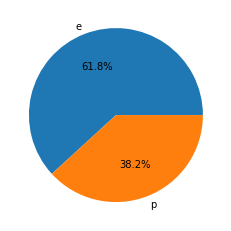

In [85]:
import matplotlib.pyplot as plt

s = agaricus_data['Class'].value_counts() / len(agaricus_data) * 100
plt.pie(s.values, labels=s.index, autopct='%.1f%%')

In [86]:
new_agaricus_data = pd.get_dummies(data=agaricus_data, columns=agaricus_data.select_dtypes(include=np.object).columns, drop_first=True)
new_agaricus_data.head()

,Class_p,Cap-shape_c,Cap-shape_f,Cap-shape_k,Cap-shape_s,Cap-shape_x,Cap-surface_g,Cap-surface_s,Cap-surface_y,Cap-color_c,Cap-color_e,Cap-color_g,Cap-color_n,Cap-color_p,Cap-color_w,Cap-color_y,Bruises?_t,Odor_c,Odor_f,Odor_l,Odor_m,Odor_n,Odor_p,Gill-attachment_f,Gill-spacing_w,Gill-size_n,Gill-color_h,Gill-color_k,Gill-color_n,Gill-color_p,Gill-color_r,Gill-color_u,Gill-color_w,Gill-color_y,Stalk-shape_t,Stalk-root_c,Stalk-root_e,Stalk-root_r,Stalk-surface-above-ring_k,Stalk-surface-above-ring_s,Stalk-surface-above-ring_y,Stalk-surface-below-ring_k,Stalk-surface-below-ring_s,Stalk-surface-below-ring_y,Stalk-color-above-ring_c,Stalk-color-above-ring_g,Stalk-color-above-ring_n,Stalk-color-above-ring_p,Stalk-color-above-ring_w,Stalk-color-above-ring_y,Stalk-color-below-ring_c,Stalk-color-below-ring_g,Stalk-color-below-ring_n,Stalk-color-below-ring_p,Stalk-color-below-ring_w,Stalk-color-below-ring_y,Veil-color_y,Ring-number_o,Ring-number_t,Ring-type_l,Ring-type_n,Ring-type_p,Spore-print-color_k,Spore-print-color_n,Spore-print-color_r,Spore-print-color_u,Spore-print-color_w,Population_c,Population_n,Population_s,Population_v,Population_y,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [88]:
agaricus_data['Class'] = agaricus_data['Class'].factorize()[0]
agaricus_data.head()

,Class,Cap-shape,Cap-surface,Cap-color,Bruises?,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,Stalk-root,Stalk-surface-above-ring,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
0,0,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
1,0,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
2,1,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
3,0,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
4,0,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g


In [ ]:
# columns = agaricus_data[quantity_cols]
# new_table = agaricus_data
# for column in columns:
#     new_table[column] = (agaricus_data[column] - agaricus_data[column].mean())/agaricus_data[column].std()
# agaricus_data

In [ ]:
agaricus_data.drop(['Veil-type'], axis=1, inplace=True)
agaricus_data.head()